In [17]:
# imports
# Import dependencies.
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func, desc
from datetime import datetime, timedelta

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
Base = automap_base()
Base.prepare(autoload_with=engine)

In [4]:
Station = Base.classes.station
Measurement = Base.classes.measurement


Link Python to Sql

In [5]:
session = Session(engine)

Precipitation Analysis

In [7]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
# Getting Columns
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])
print("=====================")
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])




id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [16]:
most_recent_date = session.query(Measurement.date).order_by(desc(Measurement.date)).first()
most_recent_date

('2017-08-23',)

In [21]:
most_recent_date_str = most_recent_date[0]
most_recent_date_str

'2017-08-23'

In [19]:
# datetime object
most_recent_date_dt = datetime.strptime(most_recent_date_str, "%Y-%m-%d")

one_year_ago = most_recent_date_dt - timedelta(days=365)

# Query precipitation data for the previous 12 months
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Convert the results to a DataFrame for easier manipulation
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Display the DataFrame
print(precipitation_df)

            Date  Precipitation
0     2016-08-24           0.08
1     2016-08-25           0.08
2     2016-08-26           0.00
3     2016-08-27           0.00
4     2016-08-28           0.01
...          ...            ...
2218  2017-08-19           0.09
2219  2017-08-20            NaN
2220  2017-08-21           0.56
2221  2017-08-22           0.50
2222  2017-08-23           0.45

[2223 rows x 2 columns]


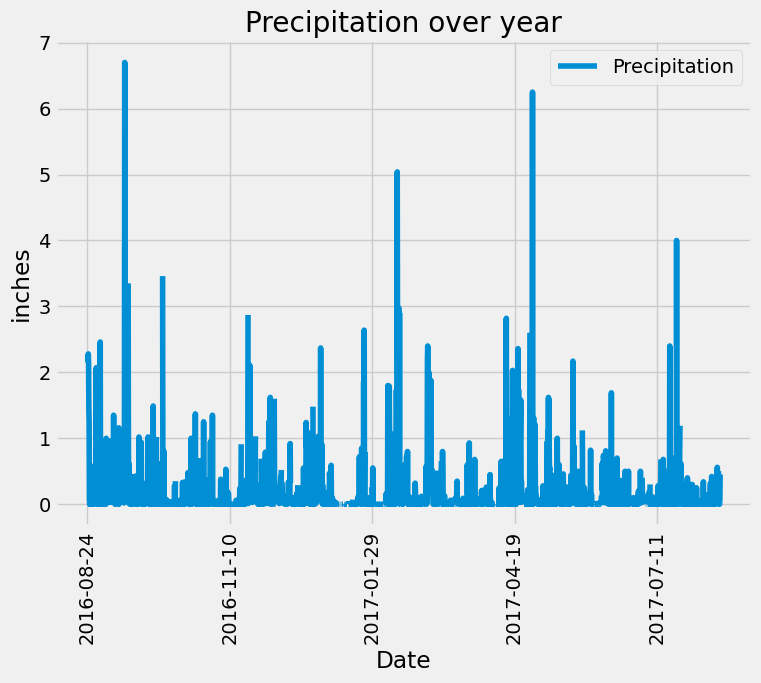

In [30]:
precipitation_df = precipitation_df.sort_values(by='Date')
# Plot the results using the DataFrame plot method
precipitation_df.plot(x='Date', y='Precipitation', figsize=(8,6))
plt.title("Precipitation over year")
plt.xlabel("Date")
plt.ylabel("inches")
plt.xticks(rotation=90)
plt.show()


In [31]:
# Simple summary statistics
print(precipitation_df['Precipitation'].describe())

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64
